In [1]:
import os
import re
import pickle
import time

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import requests
from bs4 import BeautifulSoup
import json

## Dengue

### Source: datagov (2014:2018)

https://beta.data.gov.sg/datasets/d_ac1eecf0886ff0bceefbc51556247015/view

In [13]:
filepath_datagov_dengue = r'./dengue_datagov/WeeklyNumberofDengueandDengueHaemorrhagicFeverCases.csv'
df_raw_dengue_datagov = pd.read_csv(filepath_datagov_dengue)
df_raw_dengue_datagov

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


### Source: JAO - github (2012:2019)


https://github.com/jaotheboss/Dengue-Prediction

In [14]:
filepath_jao_dengue = r'./dengue_jao/jao_dengue.csv'
df_raw_dengue_jao = pd.read_csv(filepath_jao_dengue)
df_raw_dengue_jao

,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C),Dengue (Count)
0,2012,1,1.839990,27.065217,74
1,2012,2,3.488352,26.472771,66
2,2012,3,15.048955,27.200941,61
3,2012,4,1.376449,26.809944,52
4,2012,5,8.257399,26.558095,85
...,...,...,...,...,...
407,2019,43,11.871970,27.312979,242
408,2019,44,3.706913,27.973810,308
409,2019,45,3.619977,28.819872,322
410,2019,46,2.235376,28.338643,373


### Source: NEA (2020:2024)

https://www.nea.gov.sg/dengue-zika/dengue/dengue-cases

#### Scraping

In [55]:
filepath_NEA_dengue = r'./dengue_NEA/NEA_dengue.csv'

# URL of the API endpoint that returns the chart data
url = 'https://www.nea.gov.sg/dengue-zika/dengue/dengue-cases'

# Initialize the WebDriver (e.g., using Chrome)
driver = webdriver.Chrome()

# Open the website
driver.get(url)

# Wait for the page to load (you may need to adjust the wait time)
time.sleep(5)

# Execute JavaScript to extract data points
# Modify the JavaScript based on the actual structure of the chart
data_points_or = driver.execute_script('''
    const points = [];
    document.querySelectorAll('g[clip-path="url(#kdef1)"] path').forEach(path => {
        const data = path.getAttribute('d');  // or another attribute containing data points
        points.push(data);
    });
    return points;
''')

# Print the extracted data points
for point in data_points_or:
    print(point)

# Close the WebDriver
driver.quit()

# with open('temp_NEA_raw_points.pkl','wb') as f:
#     pickle.dump(data_points_or,f)

M79.594 270.61 L 90.783 265.41 101.972 257.48 113.16 269.83 124.349 261.9 135.538 258 146.726 260.6 157.915 260.47 169.104 261.38 180.292 261.25 191.481 259.43 202.67 262.16 213.858 260.99 225.047 269.05 236.236 265.41 247.425 263.2 258.613 258.13 269.802 259.3 280.991 244.09 292.179 241.62 303.368 229.53 314.557 214.84 325.745 197.29 336.934 160.11 348.123 131.77 359.311 120.2 370.5 121.76 381.689 93.55 392.877 85.88 404.066 77.69 415.255 130.99 426.443 93.55 437.632 136.06 448.821 142.82 460.009 160.5 471.198 188.45 482.387 216.01 493.575 222.9 504.764 233.56 515.953 231.48 527.142 241.75 538.33 233.56 549.519 236.68 560.708 252.93 571.896 257.09 583.085 263.85 594.274 276.59 605.462 273.73 616.651 280.36 627.84 280.49 639.028 279.58 650.217 284.52 661.406 285.04
M79.594 282.83 L 90.783 289.46 101.972 290.37 113.16 292.19 124.349 290.89 135.538 291.54 146.726 291.02 157.915 291.15 169.104 291.8 180.292 291.8 191.481 293.36 202.67 294.4 213.858 295.18 225.047 296.87 236.236 295.83 247

In [84]:
data_points_processed = []
for path_string in data_points_or:
    # Regular expression to match pairs of floating-point numbers
    pattern = re.compile(r'([ML])\s*([\d.]+)\s*([\d.]+)|([\d.]+)\s*([\d.]+)')

    # Find all matches in the path string
    matches = pattern.findall(path_string)

    # List to store the extracted data points
    data_points = []

    # Iterate through matches and extract coordinates
    for match in matches:
        if match[0] in ['M', 'L']:  # Handle 'M' and 'L' commands
            x = float(match[1])
            y = float(match[2])
        else:  # Handle pairs of coordinates
            x = float(match[3])
            y = float(match[4])
        data_points.append((x, y))
    data_points_processed.append(data_points)

data_points_processed = [np.array(data_points) for data_points in data_points_processed]


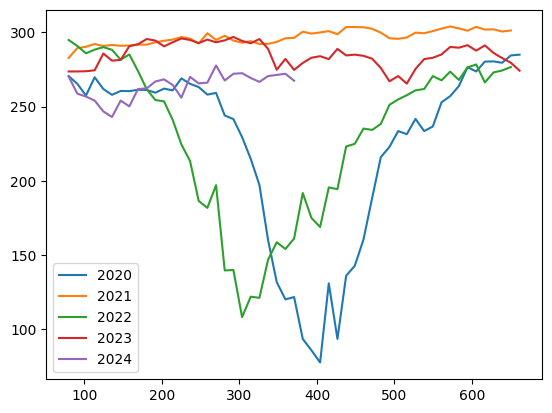

In [144]:
year_labels=[2020,2021,2022,2023,2024]
for i,chartline in enumerate(data_points_processed):
    plt.plot(chartline[:,0],chartline[:,1],label=year_labels[i])
plt.legend();

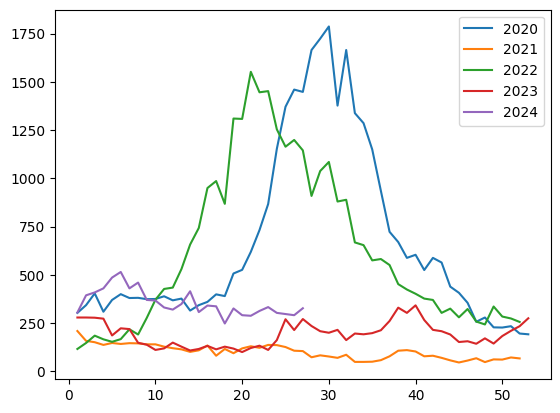

In [146]:
# Values not corresponding to actual cases, but probably locations based on different scale for plotting
# Note values given upside down.
# Scaling values between 2020 peak at 1787 and 2022 peak at 1552
val_1787 = np.min(data_points_processed[0][:,1]) # 2020 peak value corresponding to 1787 cases
val_1552 = np.min(data_points_processed[2][:,1]) # 2022 peak value corresponding to 1552 cases

scale_val = (val_1787-val_1552)/(1787-1552)
# print(f'Each count of case corresponds to {scale_val} difference in chart value')

zero_loc = val_1787 - scale_val*1787
# print(f'Zero case at location {zero_loc}')

# Flip curves back and scale to count value needed
data_points_processed_final = [-(np.array([0,zero_loc]) - chartline)/scale_val for chartline in data_points_processed]      # Shift, scale, and flip to correct dengue case count representation
data_points_processed_final = [chartline[:,1] for chartline in data_points_processed_final]                                 # keep only y values, x values just counts for week anyway

# Fill in for years with fewer than 53 weeks worth of data points, and turn into dataframe
data_points_processed_final = [np.pad(chartline, (0,53-chartline.shape[0]), 'constant', constant_values=np.nan) for chartline in data_points_processed_final]
data_points_processed_final = np.vstack(data_points_processed_final).T
df_dengue_NEA = pd.DataFrame(data_points_processed_final,columns=year_labels)
df_dengue_NEA = df_dengue_NEA.reset_index().rename(columns={'index':'week'})
df_dengue_NEA['week'] += 1

plt.plot(df_dengue_NEA['week'],df_dengue_NEA.loc[:,year_labels]);
plt.legend(year_labels)

# df_dengue_NEA.to_csv(filepath_NEA_dengue)

#### Loading data

In [ ]:
df_dengue_NEA = pd.read_csv(filepath_NEA_dengue)

### Compare datagov and jao

Small differences observed here and there

In [ ]:
df_dengue_jao = df_raw_dengue_jao.rename(columns={'Year':'year','Week No.':'eweek'})
df_dengue_jao = df_dengue_jao.drop(columns=['Daily Rainfall Total (mm)','Mean Temperature (C)'])
# df_dengue_jao.fillna(method=0)
df_dengue_datagov = df_raw_dengue_datagov.groupby(['year','eweek']).sum()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 265 entries, (2014, 1) to (2018, 53)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   number  265 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_9184\85594864.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dengue_datagov = df_raw_dengue_datagov.groupby(['year','eweek']).sum()


In [ ]:
df_raw_dengue_datagov.loc[df_raw_dengue_datagov.year==2015].loc[df_raw_dengue_datagov.eweek==3]

,year,eweek,type_dengue,number
110,2015,3,Dengue,238.0
111,2015,3,DHF,0.0


In [ ]:
df_combined = df_dengue_datagov.merge(df_dengue_jao,on=['year','eweek'],how='left')
print(df_combined.shape)
df_combined.loc[df_combined['number'] != df_combined['Dengue (Count)']]

(265, 4)


,year,eweek,number,Dengue (Count)
55,2015,3,238.0,237.0
59,2015,7,99.0,100.0
69,2015,17,119.0,120.0
92,2015,40,236.0,235.0
99,2015,47,283.0,286.0
103,2015,51,367.0,372.0
104,2015,52,457.0,459.0
105,2015,53,0.0,NaN
106,2016,1,545.0,547.0
115,2016,10,395.0,396.0


In [ ]:
(df_combined['number'] - df_combined['Dengue (Count)']).value_counts()

 0.0    220
-1.0     20
-2.0     10
-3.0      7
 1.0      2
-5.0      1
-4.0      1
dtype: int64

## Weather

### Source: data.gov (Jan2009:Nov2017)

https://beta.data.gov.sg/datasets?query=weather&resultId=d_03bb2eb67ad645d0188342fa74ad7066

In [148]:
filepath_datagov_weather = r'./weather_datagov/HistoricalDailyWeatherRecords.csv'
df_weather_datagov = pd.read_csv(filepath_datagov_weather)

In [152]:
df_weather_datagov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2859 non-null   object
 1   station                   2859 non-null   object
 2   daily_rainfall_total      2859 non-null   object
 3   highest_30_min_rainfall   2859 non-null   object
 4   highest_60_min_rainfall   2859 non-null   object
 5   highest_120_min_rainfall  2859 non-null   object
 6   mean_temperature          2859 non-null   object
 7   maximum_temperature       2859 non-null   object
 8   minimum_temperature       2859 non-null   object
 9   mean_wind_speed           2859 non-null   object
 10  max_wind_speed            2859 non-null   object
dtypes: object(11)
memory usage: 245.8+ KB


### Source: NEA

http://www.weather.gov.sg/climate-historical-daily/

#### Scraping

In [7]:
# Get station IDs and names
filepath_weather_NEA = './weather_NEA/'
filepath_save_weather_csv = './raw_files/weather_NEA/'

In [8]:
# Define the regex pattern
pattern = r"^(\d+)\s+(.*)\s1\."

# Initialize an empty list to store extracted data
data = []

# Read lines from the text file
with open(filepath_weather_NEA+'stations.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        match = re.match(pattern, line)
        if match:
            number = match.group(1)
            text = match.group(2)
            data.append({'Station': number, 'Location': text})

# Create a DataFrame from the collected data
df_stations = pd.DataFrame(data)
df_stations.sort_values('Location')

,Station,Location
38,104,Admiralty
39,105,Admiralty West
43,109,Ang Mo Kio
29,86,Boon Lay (East)
18,63,Boon Lay (West)
...,...,...
7,35,Ulu Pandan
21,69,Upper Peirce Reservoir
13,46,Upper Thomson
57,123,Whampoa


In [24]:
# Function to download CSV files
def download_weather_data(station_ID, station_name, year, month,path_to_save_directory):
    base_url = "http://www.weather.gov.sg/files/dailydata/"
    extended_url = f"DAILYDATA_S{station_ID}_{year}{month}.csv"
    filename = f"{station_name}_{station_ID}_{year}{month}.csv"
    url = base_url + extended_url
    save_path = os.path.join(path_to_save_directory, filename)  # Replace with your desired save directory

    # Send a GET request to the URL
    response = requests.get(url)
    print(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Save the CSV file
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename} successfully.")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")


station_names = list(df_stations['Station'].unique())
years = list(np.arange(2012,2025).astype('str'))
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

for index, row in df_stations.iterrows():
    for year in years:
        for month in months:
            station_ID = row['Station']
            station_name = row['Location']
            print(f'\nDownloading for Station ID: {station_ID}, Station: {station_name}, Year: {year}, Month: {month}')
            download_weather_data(station_ID, station_name, year, month,filepath_save_weather_csv)
            time.sleep(3)


http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201201.csv
Downloaded Macritchie Reservoir_07_201201.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201202.csv
Downloaded Macritchie Reservoir_07_201202.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201203.csv
Downloaded Macritchie Reservoir_07_201203.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201204.csv
Downloaded Macritchie Reservoir_07_201204.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201205.csv
Downloaded Macritchie Reservoir_07_201205.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201206.csv
Downloaded Macritchie Reservoir_07_201206.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201207.csv
Downloaded Macritchie Reservoir_07_201207.csv successfully.

http://www.weather.gov.sg/files/dailydata/DAILYDATA_S07_201208.csv
Downloaded Macritchie Reservoir_07_2

#### Compiling

In [37]:
# File save location
filepath_save_weather_csv = './raw_files/weather_NEA'

# # Loading only weather csvs and compiling source information
# weather_csvs = os.listdir(filepath_save_weather_csv)
# weather_csvs = [csv for csv in weather_csvs if '_' in csv]
# weather_attrs = [csv.split('_') for csv in weather_csvs]
# df_weather_attrs = pd.DataFrame(weather_attrs,columns=['location','station_ID','temp'])
# df_weather_attrs['temp'] = df_weather_attrs['temp'].str.rstrip('.csv')
# df_weather_attrs['year'] = df_weather_attrs['temp'].map(lambda x: x[:4])
# df_weather_attrs['month'] = df_weather_attrs['temp'].map(lambda x: x[4:])
# df_weather_attrs.drop(columns = ['temp'], inplace=True)
# df_weather_attrs = df_weather_attrs.astype({'year':'int','month':'int'})
# df_weather_attrs['filename'] = weather_csvs

# # Saving weather data source as csv
# df_weather_attrs.to_csv(filepath_weather_NEA+'weather_sources.csv',index=None)

In [98]:
# Load weather source info
df_weather_attrs = pd.read_csv(filepath_weather_NEA+'weather_sources.csv')
all_dfs = []
problematic = []
for index, row in df_weather_attrs.iterrows():
    try:
        df_weather = pd.read_csv(filepath_save_weather_csv+row['filename'],  encoding='utf-8')
    except:
        df_weather = pd.read_csv(filepath_save_weather_csv+row['filename'],  encoding='cp1252')
    # Fixing inconsistent column names
    df_weather.rename(columns={'Highest 60 min Rainfall (mm)':'Highest 60 min Rainfall (mm)', 'Highest 30 min Rainfall (mm)':'Highest 30 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)':'Highest 120 min Rainfall (mm)',
                               'Highest 60 Min Rainfall (mm)':'Highest 60 min Rainfall (mm)', 'Highest 30 Min Rainfall (mm)':'Highest 30 min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)':'Highest 120 min Rainfall (mm)'},inplace=True)
    all_dfs.append(df_weather)

df_weather = pd.concat(all_dfs,axis=0)
df_weather.replace({'\u2014': None, '-': None}, inplace=True) # Replace missing entries marked by - with None
df_weather.fillna(-1,inplace = True)        # Replace NaN with -1
df_weather = df_weather.astype({'Year':'int', 'Month':'int', 'Day':'int', 'Daily Rainfall Total (mm)':'float',
       'Highest 30 min Rainfall (mm)':'float', 'Highest 60 min Rainfall (mm)':'float',
       'Highest 120 min Rainfall (mm)':'float', 'Mean Temperature (°C)':'float',
       'Maximum Temperature (°C)':'float', 'Minimum Temperature (°C)':'float',
       'Mean Wind Speed (km/h)':'float', 'Max Wind Speed (km/h)':'float'})
df_weather.to_csv(filepath_weather_NEA+'weather_2012_2024.csv')

## Google Trends

In [6]:
# Google trend file location
filepath_google = './google_trends/'
filepath_raw_google_dengue = './raw_files/trends_dengue'
filepath_raw_google_dengue_symptoms = './raw_files/trends_dengue_symptoms'
filepath_raw_google_fever = './raw_files/trends_fever'
filepath_raw_google_mosquito = './raw_files/trends_mosquito'

In [7]:
# Load all trend files and compile into one dataframe for export to csv
trends_dengue = []
for file in os.listdir(filepath_raw_google_dengue):
    trends_dengue.append(pd.read_csv(os.path.join(filepath_raw_google_dengue,file),skiprows=1))
df_trends_dengue = pd.concat(trends_dengue,axis=0)

trends_dengue_symptoms = []
for file in os.listdir(filepath_raw_google_dengue_symptoms):
    trends_dengue_symptoms.append(pd.read_csv(os.path.join(filepath_raw_google_dengue_symptoms,file),skiprows=1))
df_trends_dengue_symptoms = pd.concat(trends_dengue_symptoms,axis=0)

trends_fever = []
for file in os.listdir(filepath_raw_google_fever):
    trends_fever.append(pd.read_csv(os.path.join(filepath_raw_google_fever,file),skiprows=1))
df_trends_fever = pd.concat(trends_fever,axis=0)

trends_mosquito = []
for file in os.listdir(filepath_raw_google_mosquito):
    trends_mosquito.append(pd.read_csv(os.path.join(filepath_raw_google_mosquito,file),skiprows=1))
df_trends_mosquito = pd.concat(trends_mosquito,axis=0)

df_trends_dengue.to_csv(os.path.join(filepath_google,'google_trend_dengue.csv'),index=None)
df_trends_dengue_symptoms.to_csv(os.path.join(filepath_google,'google_trend_dengue_symptoms.csv'),index=None)
df_trends_fever.to_csv(os.path.join(filepath_google,'google_trend_fever.csv'),index=None)
df_trends_mosquito.to_csv(os.path.join(filepath_google,'google_trend_mosquito.csv'),index=None)

In [9]:
# Load files
df_trends_dengue = pd.read_csv(os.path.join(filepath_google,'google_trend_dengue.csv'))
df_trends_dengue_symptoms = pd.read_csv(os.path.join(filepath_google,'google_trend_dengue_symptoms.csv'))
df_trends_fever = pd.read_csv(os.path.join(filepath_google,'google_trend_fever.csv'))
df_trends_mosquito = pd.read_csv(os.path.join(filepath_google,'google_trend_mosquito.csv'))

display(df_trends_dengue)
display(df_trends_dengue_symptoms)
display(df_trends_fever)
display(df_trends_mosquito)

,Week,dengue: (Singapore)
0,2014-12-28,51
1,2015-01-04,51
2,2015-01-11,51
3,2015-01-18,49
4,2015-01-25,62
...,...,...
660,2024-06-16,63
661,2024-06-23,63
662,2024-06-30,58
663,2024-07-07,57


,Week,dengue symptoms: (Singapore)
0,2021-12-26,0
1,2022-01-02,0
2,2022-01-09,11
3,2022-01-16,0
4,2022-01-23,0
...,...,...
660,2019-12-01,39
661,2019-12-08,40
662,2019-12-15,35
663,2019-12-22,57


,Week,fever: (Singapore)
0,2013-12-29,84
1,2014-01-05,81
2,2014-01-12,78
3,2014-01-19,84
4,2014-01-26,77
...,...,...
661,2019-12-01,76
662,2019-12-08,76
663,2019-12-15,88
664,2019-12-22,95


,Week,mosquito: (Singapore)
0,2012-12-30,28
1,2013-01-06,28
2,2013-01-13,26
3,2013-01-20,30
4,2013-01-27,28
...,...,...
661,2012-12-02,87
662,2012-12-09,55
663,2012-12-16,67
664,2012-12-23,80
